In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer

In [2]:
df_mv = pd.read_csv("data/after_sept.csv", parse_dates=["Time"])

In [3]:
#df_mv.set_index("Time", inplace=True)

In [4]:
#df_mv = df_mv.drop(["Time.1"], axis=1)
#df_mv.to_csv("data_wo_imp.csv")

In [3]:
df_mv.isna().sum()

Time                            0
Screw Speed                     0
Gas Flow Rate               28287
Steam Flow Rate               486
Steam Pressure              21935
Oven-Home Temperature        1345
Water Temperature           13471
Oxygen_pct                    225
Oven-Home Pressure            360
Combustion Air Pressure      2871
Temperature before prear     1680
Temperature after prear      1433
Burner Position                 0
Burner_pct                   1507
Borra Flow Rate                 0
Cisco Flow Rate                 0
dtype: int64

In [6]:
knnimputer = KNNImputer(n_neighbors=5, weights="distance")

In [4]:
df_to_imp = df_mv.copy()
df_to_imp.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Screw Speed,393120.0,26.359360,10.263732,0.000000,24.040000,32.780000,32.780000,33.760000
Gas Flow Rate,364833.0,569.188150,243.599352,0.012443,464.902446,501.738407,737.483504,1122.233551
Steam Flow Rate,392634.0,24392.151674,8061.683005,0.000000,23443.840447,26605.979480,28933.350000,38155.045620
Steam Pressure,371185.0,16.654992,2.125220,0.030692,16.181849,16.748969,17.483942,21.418468
Oven-Home Temperature,391775.0,698.706287,188.375015,24.007220,713.927261,750.588225,779.064228,992.378338
Water Temperature,379649.0,97.340840,14.772873,24.005129,97.078305,101.764816,104.101450,119.994460
Oxygen_pct,392895.0,12.851771,1.817227,0.050764,11.752390,12.925685,13.948266,26.264100
Oven-Home Pressure,392760.0,-8.209016,4.078742,-24.993583,-10.309021,-8.315419,-6.447884,18.026990
Combustion Air Pressure,390249.0,100.298756,22.423345,0.000000,104.103011,105.046252,105.973964,147.270054
Temperature before prear,391440.0,230.733350,49.153482,24.002456,239.492200,244.434822,248.063774,267.883066


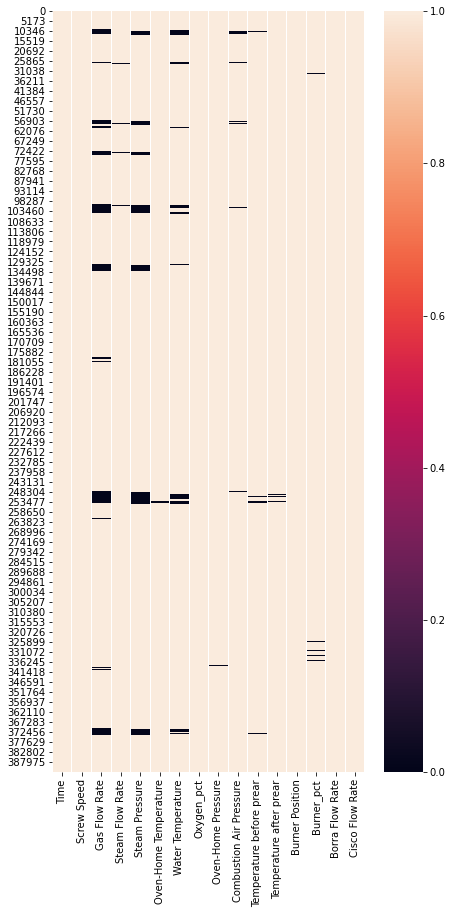

In [5]:
fig, ax = plt.subplots(figsize=(7,14))
sns.heatmap(df_mv[df_to_imp.columns].notna(), ax=ax)
plt.savefig("atypical_values.png")
plt.show()

In [ ]:
df_to_imp.head(2)

In [13]:
%%time
data_imp = knnimputer.fit_transform(df_to_imp)
data_imp[0]

Wall time: 14min 24s


array([ 3.27800000e+01,  4.89594694e+02,  2.77050949e+04,  1.64121319e+01,
        7.64975167e+02,  9.94221435e+01,  1.09216623e+01, -7.76736113e+00,
        1.01250011e+02,  2.33077615e+02,  1.71093059e+02,  3.37954595e+01,
        3.29077225e+01,  9.80380000e+04,  1.89726000e+04])

In [14]:
data_imp[0]

array([ 3.27800000e+01,  4.89594694e+02,  2.77050949e+04,  1.64121319e+01,
        7.64975167e+02,  9.94221435e+01,  1.09216623e+01, -7.76736113e+00,
        1.01250011e+02,  2.33077615e+02,  1.71093059e+02,  3.37954595e+01,
        3.29077225e+01,  9.80380000e+04,  1.89726000e+04])

In [15]:
df_imp = pd.DataFrame(data_imp, index= df_to_imp.index, columns = df_to_imp.columns)
df_imp.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Screw Speed,393120.0,26.359360,10.263732,0.000000,24.040000,32.780000,32.780000,33.760000
Gas Flow Rate,393120.0,538.851677,260.168098,0.012443,400.868111,495.488338,711.400380,1122.233551
Steam Flow Rate,393120.0,24362.038720,8102.043664,0.000000,23424.873655,26600.198185,28933.350000,38155.045620
Steam Pressure,393120.0,15.799498,4.130811,0.030692,16.086644,16.674132,17.434989,21.418468
Oven-Home Temperature,393120.0,696.525459,191.720024,24.007220,713.386719,750.390751,778.941647,992.378338
Water Temperature,393120.0,95.679084,18.141907,24.005129,96.407344,101.629384,104.077150,119.994460
Oxygen_pct,393120.0,12.851183,1.817485,0.050764,11.751651,12.925133,13.947930,26.264100
Oven-Home Pressure,393120.0,-8.210486,4.078588,-24.993583,-10.310869,-8.316703,-6.449626,18.026990
Combustion Air Pressure,393120.0,99.604773,23.814895,0.000000,104.060144,105.038187,105.961934,147.270054
Temperature before prear,393120.0,229.924321,50.607902,24.002456,239.395149,244.403911,248.045518,267.883066


In [16]:
%%time
df_imp2 = df_to_imp.interpolate(method="linear", axis=0)
df_imp2.describe().transpose()

Wall time: 484 ms


,count,mean,std,min,25%,50%,75%,max
Screw Speed,393120.0,26.359360,10.263732,0.000000,24.040000,32.780000,32.780000,33.760000
Gas Flow Rate,393120.0,536.303078,263.285439,0.012443,397.148610,495.305196,710.769100,1122.233551
Steam Flow Rate,393120.0,24362.005282,8102.136071,0.000000,23424.873655,26600.198185,28933.350000,38155.045620
Steam Pressure,393120.0,15.728223,4.335785,0.030692,16.084317,16.674117,17.434959,21.418468
Oven-Home Temperature,393120.0,696.410019,192.092829,24.007220,713.386719,750.390751,778.941647,992.378338
Water Temperature,393120.0,95.066158,19.374020,24.005129,96.246924,101.579310,104.050290,119.994460
Oxygen_pct,393120.0,12.850129,1.821390,0.050764,11.751327,12.925220,13.948188,26.264100
Oven-Home Pressure,393120.0,-8.208082,4.079671,-24.993583,-10.309036,-8.314718,-6.444637,18.026990
Combustion Air Pressure,393120.0,99.587648,23.846356,0.000000,104.059541,105.038094,105.961934,147.270054
Temperature before prear,393120.0,229.854715,50.849477,24.002456,239.395149,244.403911,248.045518,267.883066


In [17]:
print("stop")

stop


In [18]:
df_imp.to_csv("data/sept_imp_KNN.csv")

In [19]:
df_imp2.to_csv("data/sept_imp_interpolate.csv")

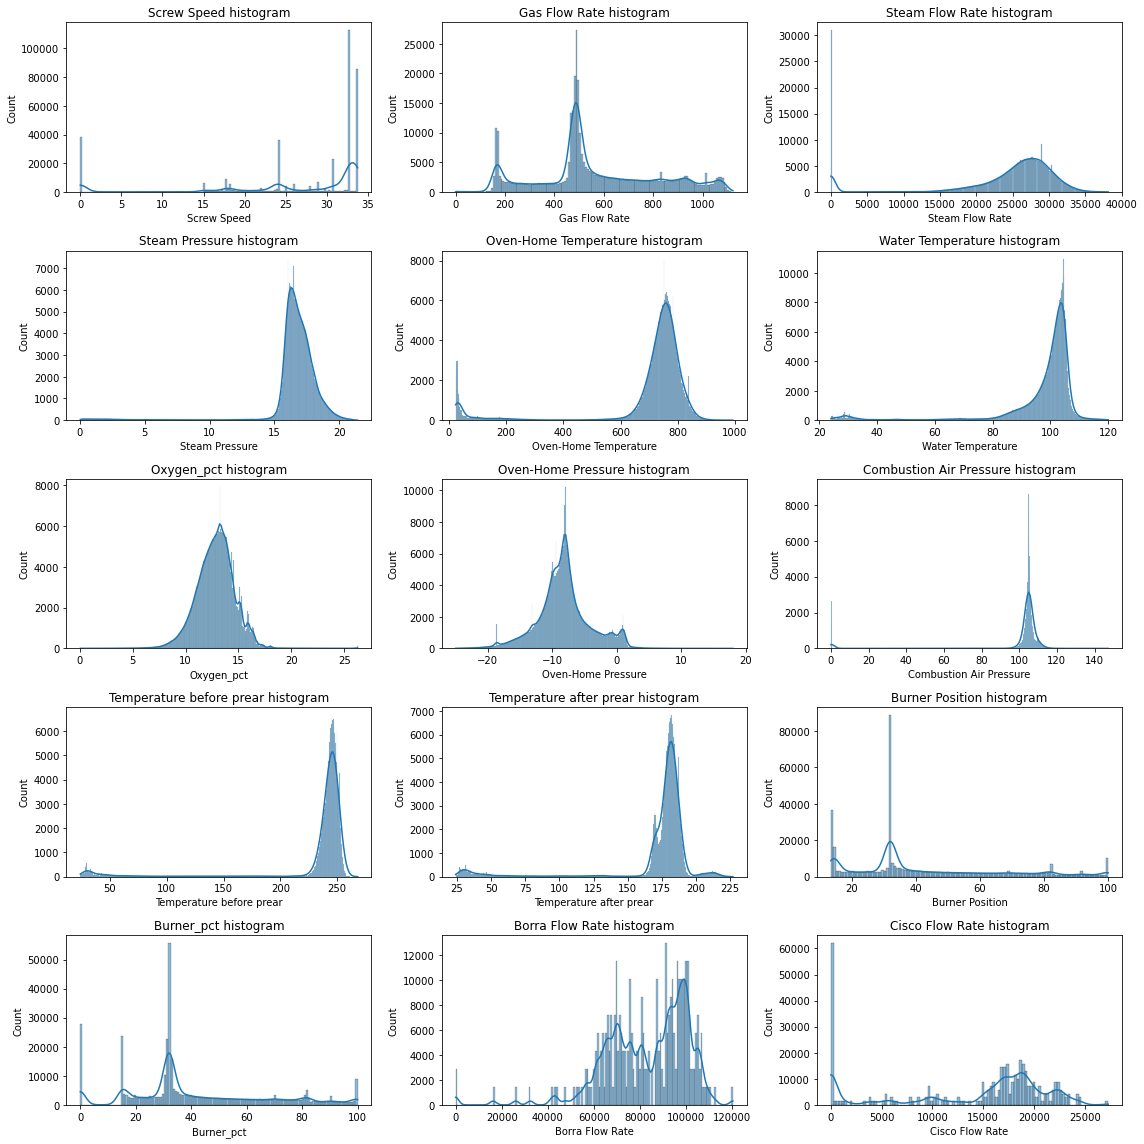

In [8]:
plt.figure(figsize=(16, 16))
for i, column in enumerate(df_mv.drop(["Time"], axis=1).columns):
    plt.subplot(5, 3, i+1)
    sns.histplot(data=df_mv, x=column, kde=True)
    plt.title(f"{column} histogram")
plt.tight_layout()
plt.savefig("data_after.png")
plt.show()

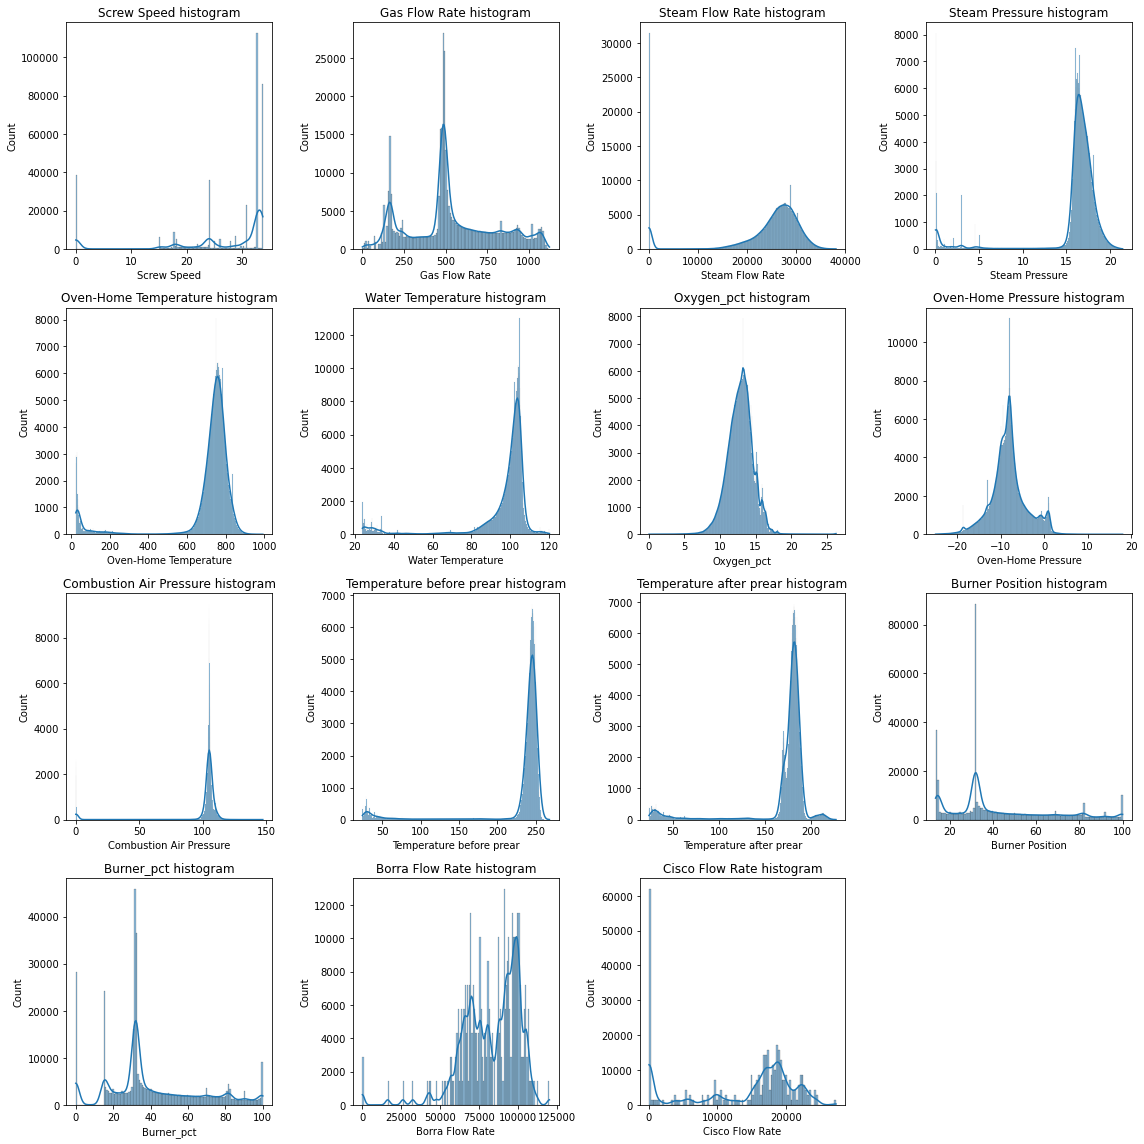

In [21]:
plt.figure(figsize=(16, 16))
for i, column in enumerate(df_imp.columns):
    plt.subplot(4, 4, i+1)
    sns.histplot(data=df_imp, x=column, kde=True)
    plt.title(f"{column} histogram")
plt.tight_layout()
plt.show()

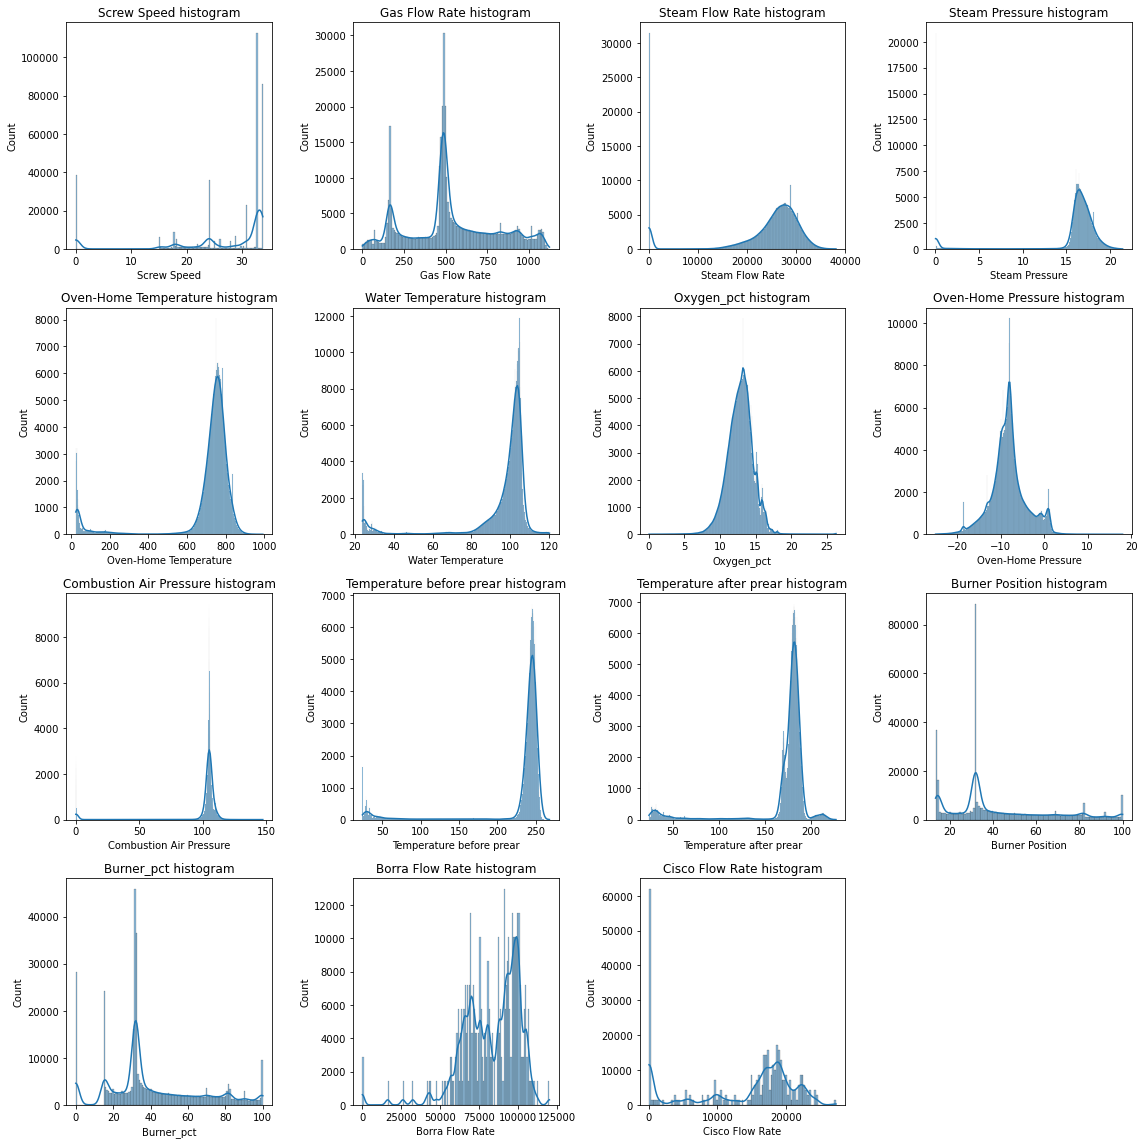

In [22]:
plt.figure(figsize=(16, 16))
for i, column in enumerate(df_imp.columns):
    plt.subplot(4, 4, i+1)
    sns.histplot(data=df_imp2, x=column, kde=True)
    plt.title(f"{column} histogram")
plt.tight_layout()
plt.show()

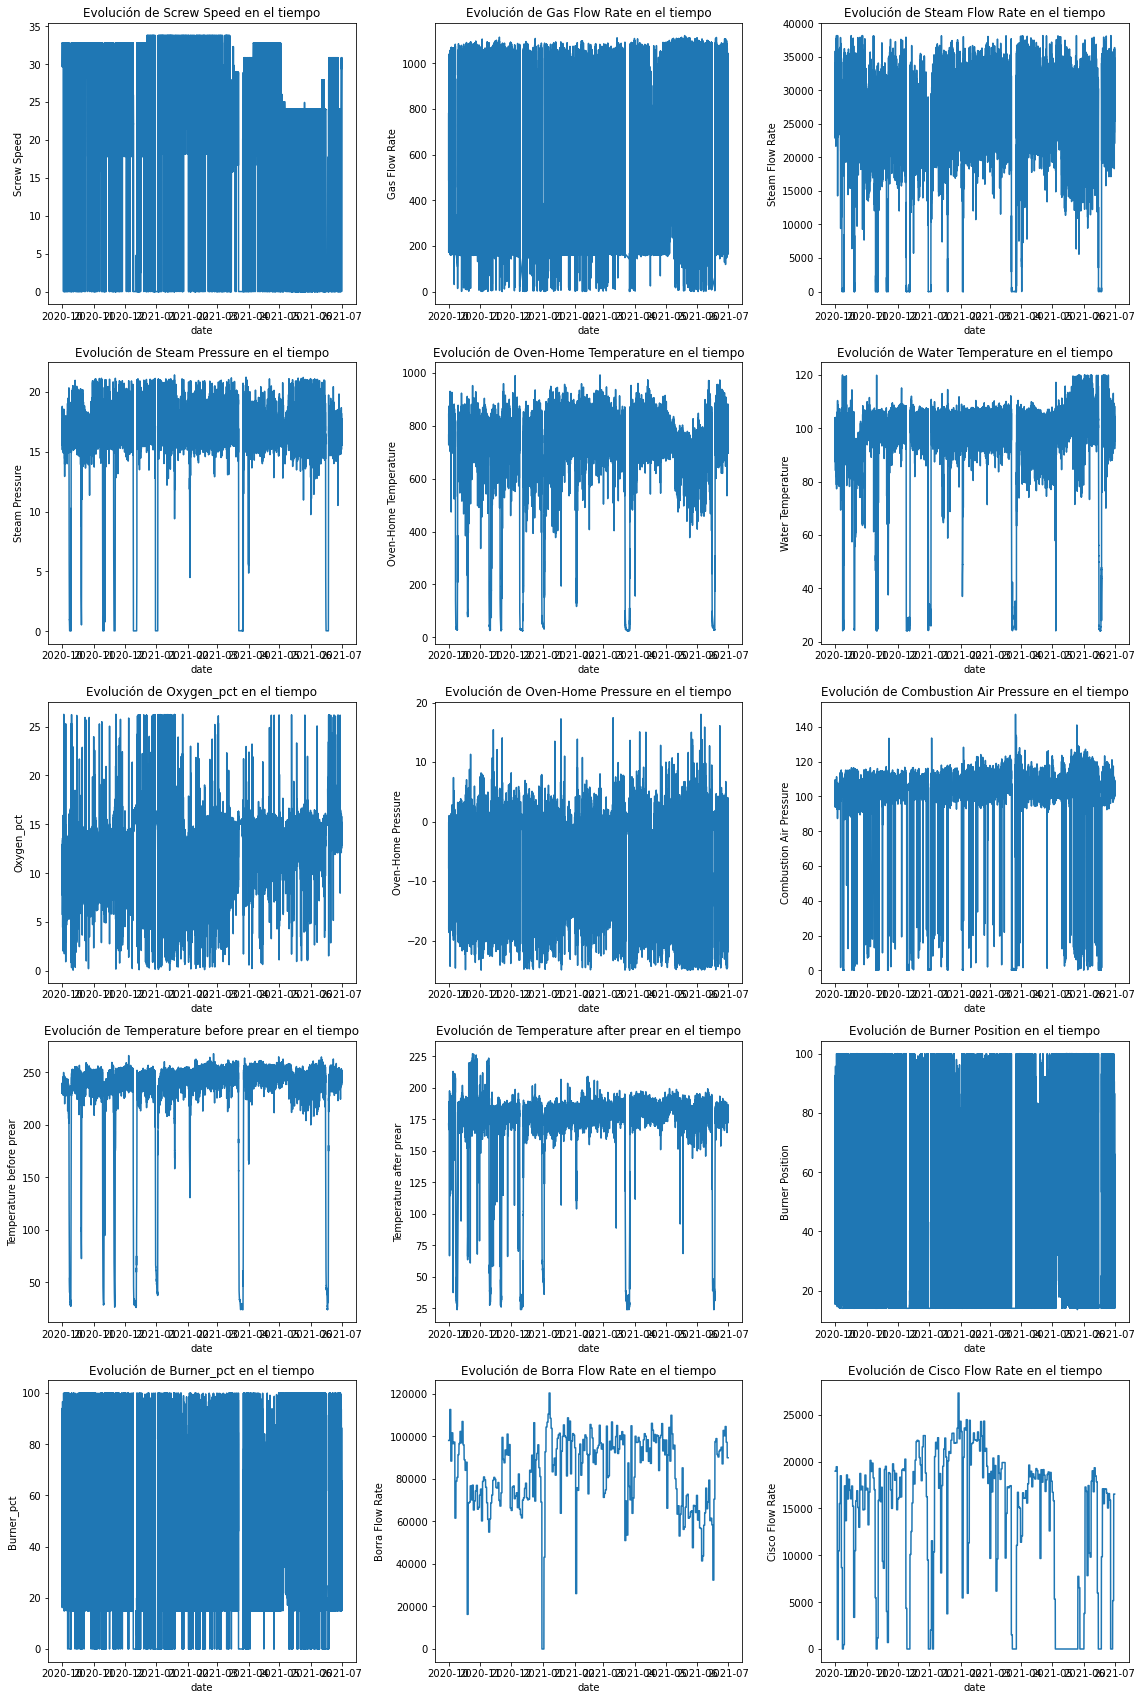

In [23]:
fig = plt.figure(figsize = (16, 28))
for i, column in enumerate(df_imp.columns):
    plt.subplot(6,3,i+1)
    sns.lineplot(data= df_mv, x = df_mv.index, y = column)
    plt.title(f'Evolución de {column} en el tiempo')
    plt.ylabel(column)
    plt.xlabel('date')
    #plt.xticks(rotation=90)
    #plt.xlim(df["date"].min(), pd.to_datetime("1st of jan, 2011"))
    #plt.xlim(pd.to_datetime("1st of dec, 2010"), pd.to_datetime("1st of jan, 2011"))

plt.tight_layout()
plt.show()

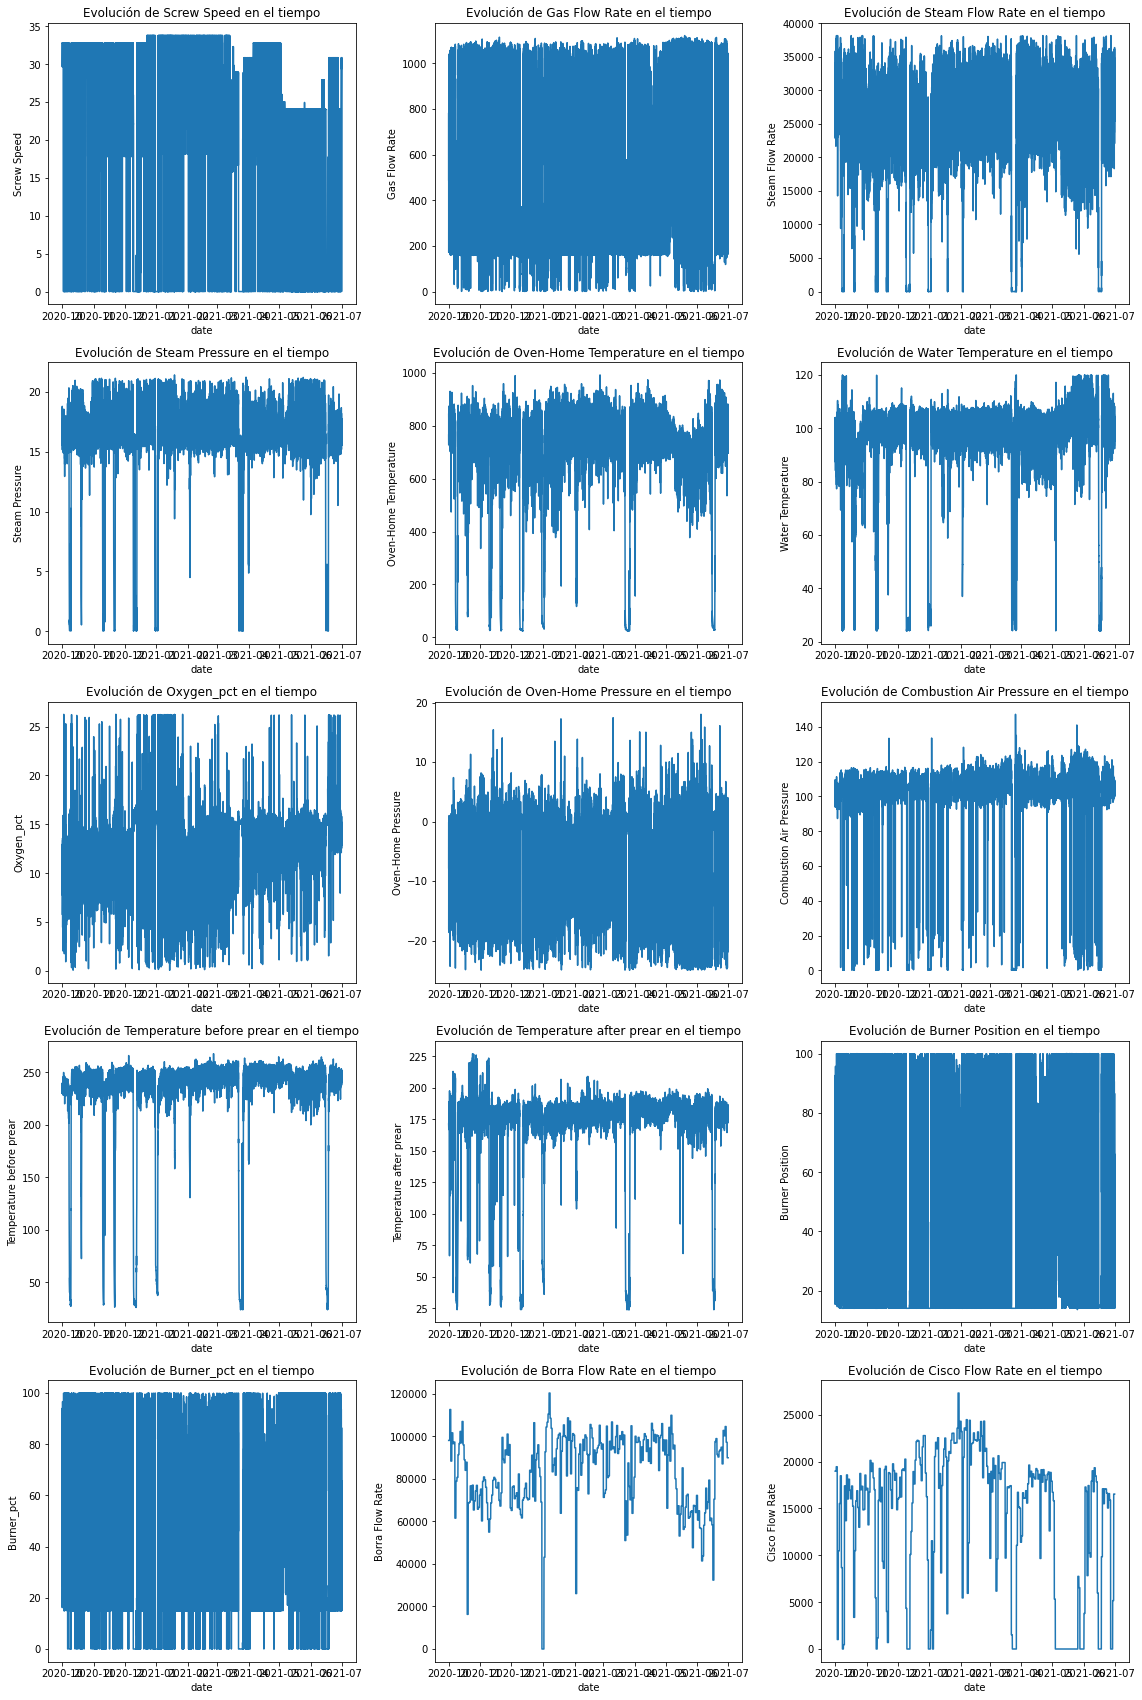

In [24]:
fig = plt.figure(figsize = (16, 28))
for i, column in enumerate(df_imp.columns):
    plt.subplot(6,3,i+1)
    sns.lineplot(data= df_imp, x = df_imp.index, y = column)
    plt.title(f'Evolución de {column} en el tiempo')
    plt.ylabel(column)
    plt.xlabel('date')
    #plt.xticks(rotation=90)
    #plt.xlim(df["date"].min(), pd.to_datetime("1st of jan, 2011"))
    #plt.xlim(pd.to_datetime("1st of dec, 2010"), pd.to_datetime("1st of jan, 2011"))

plt.tight_layout()
plt.show()

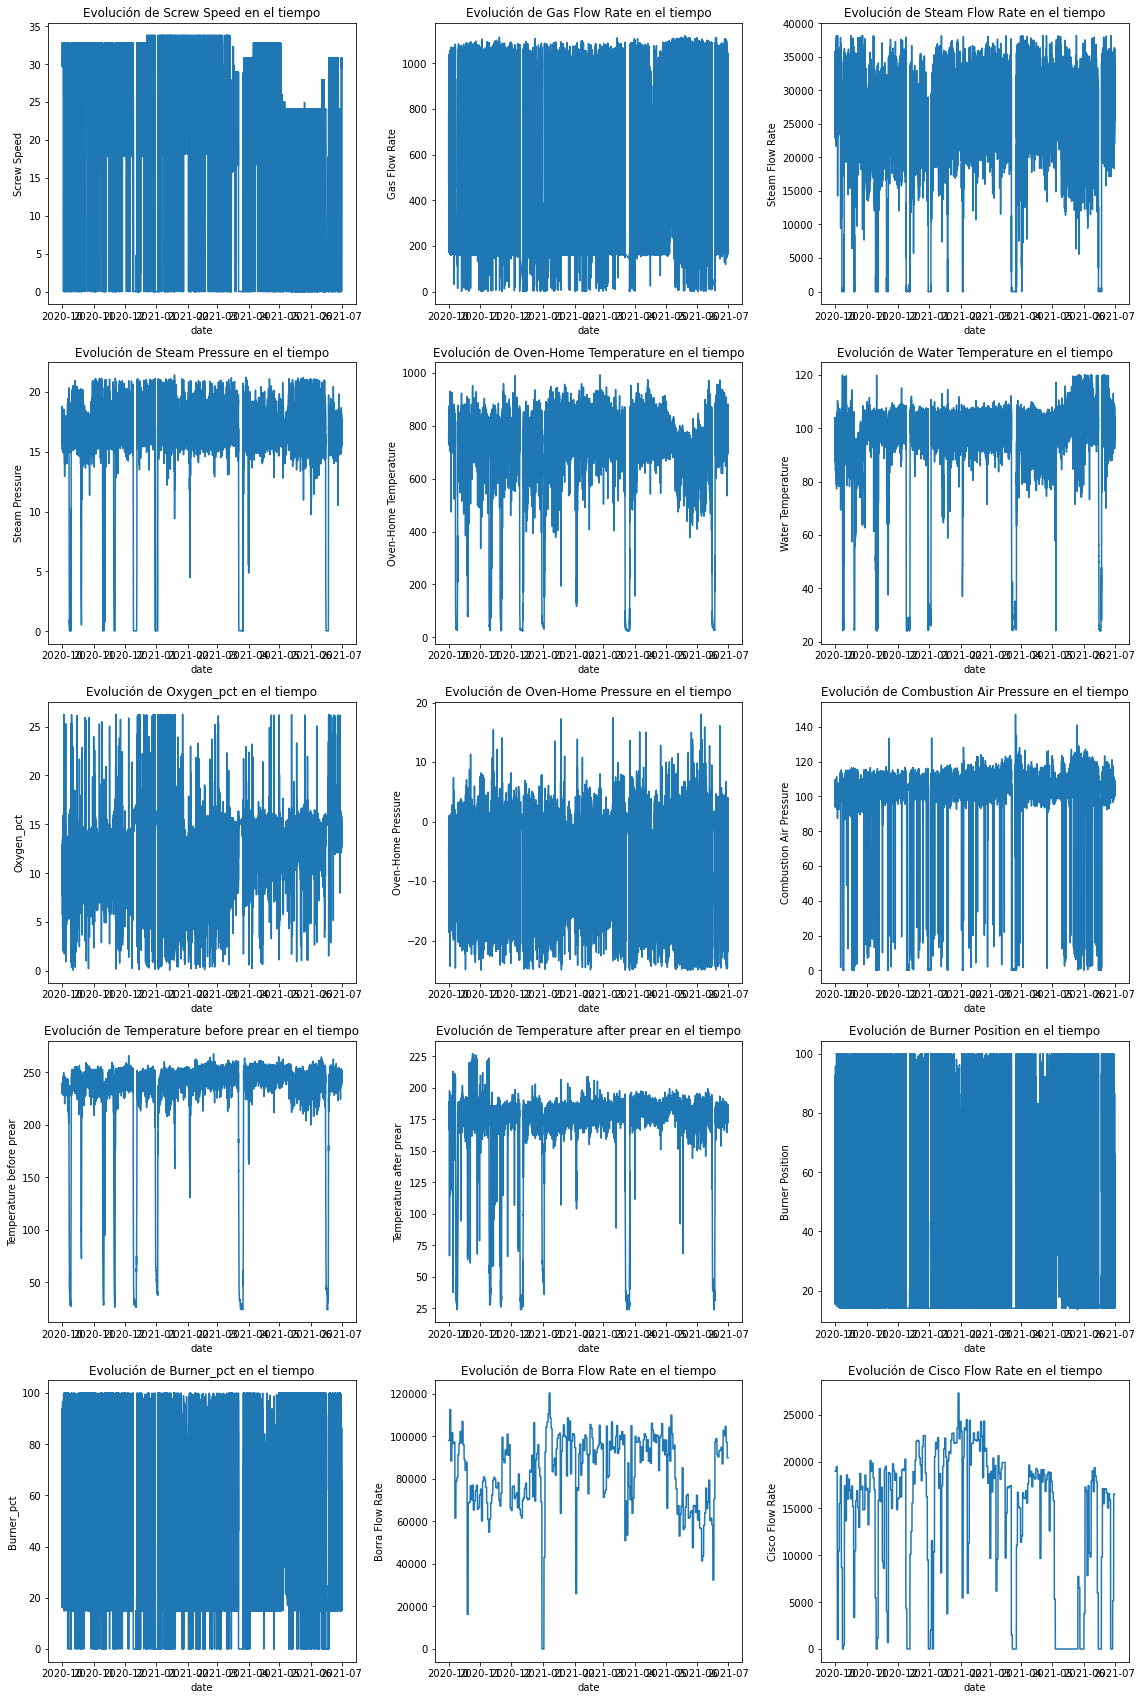

In [25]:
fig = plt.figure(figsize = (16, 28))
for i, column in enumerate(df_imp.columns):
    plt.subplot(6,3,i+1)
    sns.lineplot(data= df_imp2, x = df_imp2.index, y = column)
    plt.title(f'Evolución de {column} en el tiempo')
    plt.ylabel(column)
    plt.xlabel('date')
    #plt.xticks(rotation=90)
    #plt.xlim(df["date"].min(), pd.to_datetime("1st of jan, 2011"))
    #plt.xlim(pd.to_datetime("1st of dec, 2010"), pd.to_datetime("1st of jan, 2011"))

plt.tight_layout()
plt.show()